
The data used is publicly available on Kaggle, and can be accessed via the following link: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022?select=Base.csv

Specifically, the Base variant of the dataset will be used in the analysis.

# I. Loading necessary packages

In [1]:
# allows us to ignore warnings, since they are just warnings
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline
plt.switch_backend('agg')

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# for use with CAP report
from scipy import integrate

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# pip install imbalanced-learn (open anaconda prompt as admin)
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)
# This module is used for handling imbalanced data
from imblearn.over_sampling import SMOTE

# Collections is a core python module. We wille use counter only for reporting
from collections import Counter




In [2]:
#!pip install outlier_utils

In [3]:
# allows us to ignore warnings, since they are just warnings
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# Data Visualization
import seaborn as sns

# II. Loading Data, Data Exploration, and Preparation


In [4]:
data_df = pd.read_csv(r"C:\Users\Bryan\Documents\Files\h u s t l e\grad school\PMDSA\2.0 [2024] Second Semester\Stat280 (Practical Machine Learning)\00 Datasets\02 Fraud Detection\Base.csv")

In [5]:
data_df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.300000,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.000000,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.800000,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.000000,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.800000,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.000000,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.600000,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.000000,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.900000,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.000000,0,INTERNET,3.743048,other,0,1,0,0


In [6]:
# Do we have rows that have any null values?
#data_df.isnull().values.any()

# Query shows that there are no null values since nulls are encoded as -1. This will be fixed in subsequent code blocks.

In [7]:
# Let's have a quick view of the dataset
tmp_df = data_df.head(1).T
tmp_df.columns = ['sample']
tmp_df['dtypes'] = data_df.dtypes
tmp_df

,sample,dtypes
fraud_bool,0,int64
income,0.300000,float64
name_email_similarity,0.986506,float64
prev_address_months_count,-1,int64
current_address_months_count,25,int64
customer_age,40,int64
days_since_request,0.006735,float64
intended_balcon_amount,102.453711,float64
payment_type,AA,object
zip_count_4w,1059,int64


The variables are described as follows: 
- income (numeric): Annual income of the applicant (in decile form). Ranges between[0.1, 0.9].
- name_email_similarity (numeric): Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0,1].
- prev_address_months_count (numeric): Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1,380] months (-1 is a missing value).
- current_address_months_count (numeric): Months in currently registered address of the applicant. Ranges between [−1,429] months (-1 is a missing value).
- customer_age (numeric): Applicant’s age in years, rounded to the decade. Ranges between [10,90] years.
- days_since_request (numeric): Number of days passed since application was done. Ranges between [0,79] days.
- intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [−16,114] (negatives are missing values).
- payment_type (categorical): Credit payment plan type. 5 possible (anonymized)values.
- zip_count_4w (numeric): Number of applications within same zip code in last 4 weeks.Ranges between [1,6830].
- velocity_6h (numeric): Velocity of total applications made in last 6 hours i.e., averagenumber of applications per hour in the last 6 hours. Ranges between [−175,16818].
- velocity_24h (numeric): Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297,9586]
- velocity_4w (numeric): Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825,7020].
- bank_branch_count_8w (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0,2404].
- date_of_birth_distinct_emails_4w (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0,39].
- employment_status (categorical): Employment status of the applicant. 7 possible (anonymized) values.
- credit_risk_score (numeric): Internal score of application risk. Ranges between
 [−191,389].
 - email_is_free (binary): Domain of application email (either free or paid).
 - housing_status (categorical): Current residential status for applicant. 7 possible(anonymized) values.
 - phone_home_valid (binary): Validity of provided home phone.
 - phone_mobile_valid (binary): Validity of provided mobile phone.
 - bank_months_count (numeric): How old is previous account (if held) in months.Ranges between [−1,32] months (-1 is a missing value).
 - has_other_cards (binary): If applicant has other cards from the same banking company.
 - proposed_credit_limit (numeric): Applicant’s proposed credit limit. Ranges between[200, 2000].
 - foreign_request (binary): If origin country of request is different from bank’s country.
 - source (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).
 - session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [−1,107] minutes (-1 is a missing value).
 - device_os (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.
 - keep_alive_session (binary): User option on session logout.
 - device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1,2] emails (-1 is a missing value).
 - device_fraud_count (numeric): Number of fraudulent applications with used device. Ranges between [0,1].
 - month (numeric): Month where the application was made. Ranges between [0,7].
 - fraud_bool (binary): If the application is fraudulent or not.
 
 This is taken from the datasheet given in the following link: https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf

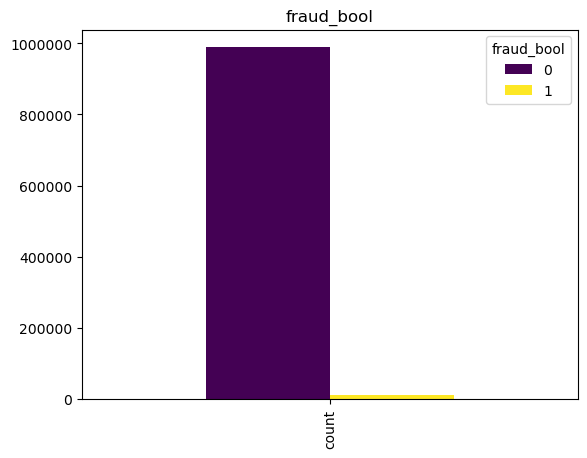

In [8]:
col = 'fraud_bool'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [9]:
# There is a large imbalance between the two classes
display(tmp_df)

fraud_bool,0,1
count,988971,11029


Let's try to better understand our data.

In [10]:
# Lets split the variables based on their types, whether they are discrete, continuous, or categorical variables.
df_num = data_df.select_dtypes(include=np.number) # Numeric
df_num = df_num.drop('fraud_bool', axis = 1)
df_cat = data_df.select_dtypes(include=["object", "bool"]) # Categorical

In [11]:
# Summary Statistics for Numeric Data
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
income,1000000.000000,0.562696,0.290343,0.100000,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.000000,0.493694,0.289125,0.000001,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.000000,16.718568,44.046230,-1.000000,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.000000,86.587867,88.406599,-1.000000,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.000000,33.689080,12.025799,10.000000,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.000000,1.025705,5.381835,0.000000,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.000000,8.661499,20.236155,-15.530555,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.000000,1572.692049,1005.374565,1.000000,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.000000,5665.296605,3009.380665,-170.603072,3436.365848,5319.769349,7680.717827,16715.565404
velocity_24h,1000000.000000,4769.781965,1479.212612,1300.307314,3593.179135,4749.921161,5752.574191,9506.896596


In [12]:
# Checking if there are constant variables (i.e. variables that only contain one value in the entire dataset)
data_df['device_fraud_count'].value_counts()


device_fraud_count
0    1000000
Name: count, dtype: int64

In [13]:
# We drop the variable device_fraud_count due to being constant all-thoughout the dataset
data_df = data_df.drop('device_fraud_count', axis = 1)

In [14]:
# Summary Statistics for Non-Numeric variables
df_cat.describe().transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [15]:
data_df['source'].value_counts()

source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64

In [16]:
7048/992952
# Therefore, we can also drop the source variable due to the huge imbalance in the data.
data_df = data_df.drop('source', axis = 1)

In [17]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    data_df.loc[data_df[feature] < 0, feature] = np.nan 
    missing_vals_col = data_df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                           71.060000                      0.430000   
1                           91.890000                      0.130000   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                        74.090000          25.230000   
1                        88.380000          37.540000   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                            0.200000                   0.040000  
1                            0.160000                   0.040000  


IndexError: index 5 is out of bounds for axis 0 with size 5

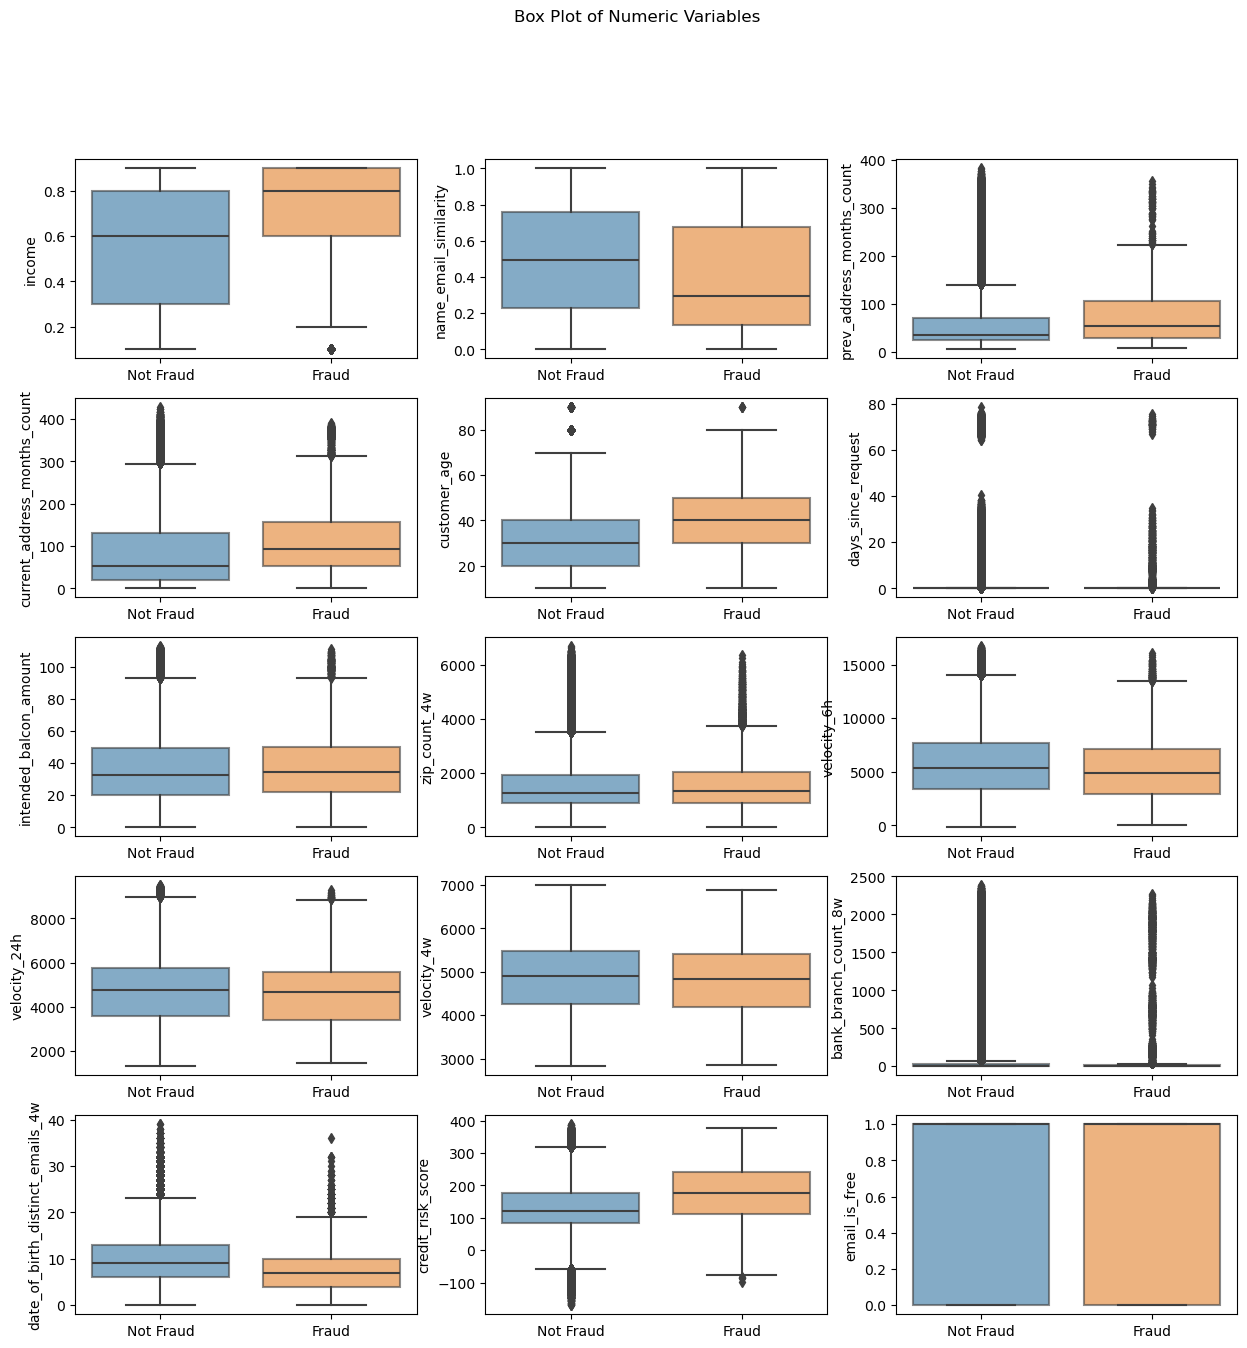

In [18]:
# Subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plot of Numeric Variables')

# Loop
for i, feature in enumerate(df_num):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=data_df, x='fraud_bool', y=feature, ax=ax, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

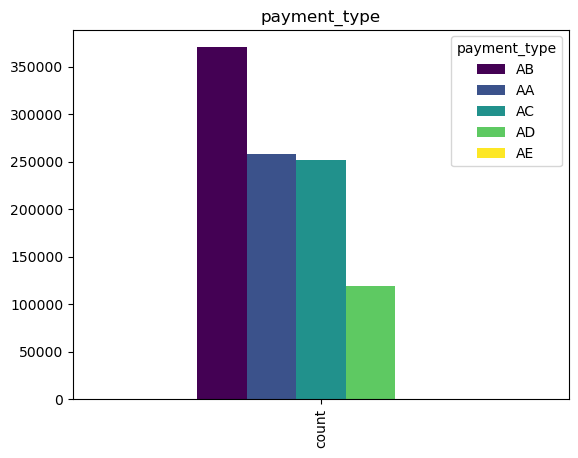

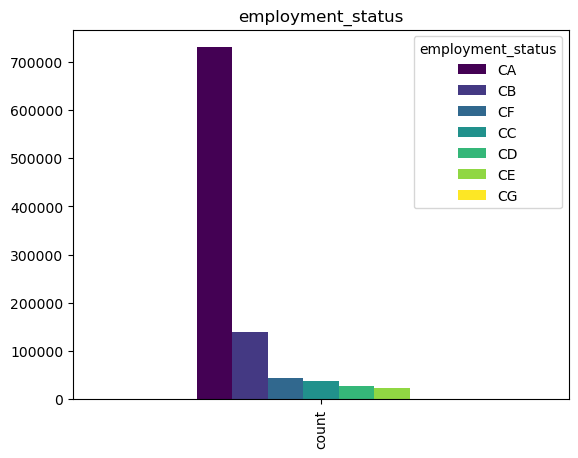

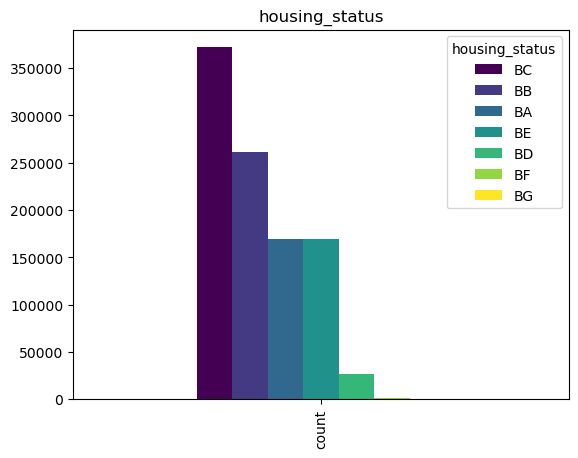

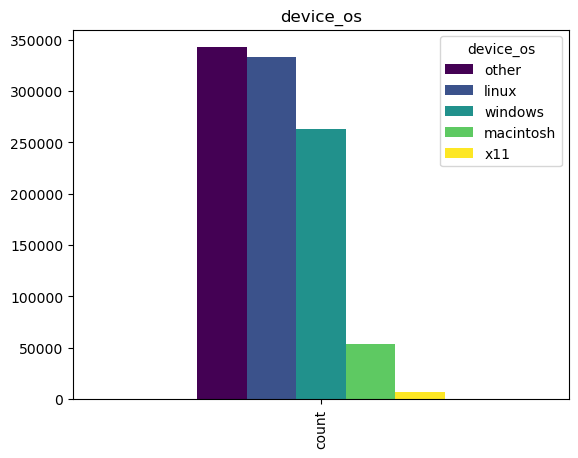

In [19]:
# Payment Type
col = 'payment_type'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Employment Status
col = 'employment_status'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Housing Status
col = 'housing_status'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


# Device OS
col = 'device_os'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

## II.1 Data Preprocessing

### II.1.A. Data Preprocessing for Categorical Values -- Creating dummy variables

In [20]:
data_df_features = data_df.drop("fraud_bool", axis=1)
data_df_target = data_df["fraud_bool"]

In [21]:
data_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.300000,0.986506,NaN,25.000000,40,0.006735,102.453711,AA,1059,...,1,9.000000,0,1500.000000,0,16.224843,linux,1,1.000000,0
1,0,0.800000,0.617426,NaN,89.000000,20,0.010095,NaN,AD,1658,...,1,2.000000,0,1500.000000,0,3.363854,other,1,1.000000,0
2,0,0.800000,0.996707,9.000000,14.000000,40,0.012316,NaN,AB,1095,...,1,30.000000,0,200.000000,0,22.730559,windows,0,1.000000,0
3,0,0.600000,0.475100,11.000000,14.000000,30,0.006991,NaN,AB,3483,...,1,1.000000,0,200.000000,0,15.215816,linux,1,1.000000,0
4,0,0.900000,0.842307,NaN,29.000000,40,5.742626,47.152498,AA,2339,...,1,26.000000,0,200.000000,0,3.743048,other,0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.800000,0.124690,NaN,143.000000,30,0.051348,NaN,AB,530,...,1,31.000000,0,1500.000000,0,16.967770,other,0,1.000000,7
999996,0,0.900000,0.824544,NaN,193.000000,30,0.009591,0.008307,AC,408,...,1,NaN,1,1000.000000,0,1.504109,macintosh,0,1.000000,7
999997,0,0.800000,0.140891,NaN,202.000000,10,0.059287,50.609995,AA,749,...,1,31.000000,0,200.000000,0,16.068595,other,0,1.000000,7
999998,0,0.900000,0.002480,52.000000,3.000000,30,0.023357,NaN,AB,707,...,1,1.000000,0,200.000000,0,1.378683,linux,1,1.000000,7


In [22]:
data_df_features

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0.300000,0.986506,NaN,25.000000,40,0.006735,102.453711,AA,1059,13096.035018,...,1,9.000000,0,1500.000000,0,16.224843,linux,1,1.000000,0
1,0.800000,0.617426,NaN,89.000000,20,0.010095,NaN,AD,1658,9223.283431,...,1,2.000000,0,1500.000000,0,3.363854,other,1,1.000000,0
2,0.800000,0.996707,9.000000,14.000000,40,0.012316,NaN,AB,1095,4471.472149,...,1,30.000000,0,200.000000,0,22.730559,windows,0,1.000000,0
3,0.600000,0.475100,11.000000,14.000000,30,0.006991,NaN,AB,3483,14431.993621,...,1,1.000000,0,200.000000,0,15.215816,linux,1,1.000000,0
4,0.900000,0.842307,NaN,29.000000,40,5.742626,47.152498,AA,2339,7601.511579,...,1,26.000000,0,200.000000,0,3.743048,other,0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.800000,0.124690,NaN,143.000000,30,0.051348,NaN,AB,530,6732.602414,...,1,31.000000,0,1500.000000,0,16.967770,other,0,1.000000,7
999996,0.900000,0.824544,NaN,193.000000,30,0.009591,0.008307,AC,408,1574.293294,...,1,NaN,1,1000.000000,0,1.504109,macintosh,0,1.000000,7
999997,0.800000,0.140891,NaN,202.000000,10,0.059287,50.609995,AA,749,1258.864938,...,1,31.000000,0,200.000000,0,16.068595,other,0,1.000000,7
999998,0.900000,0.002480,52.000000,3.000000,30,0.023357,NaN,AB,707,7048.137128,...,1,1.000000,0,200.000000,0,1.378683,linux,1,1.000000,7


In [23]:
data_df_target

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud_bool, Length: 1000000, dtype: int64

In [24]:
categorical_features = [x for x in data_df_features.columns if data_df_features[x].dtypes == "O"]
print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'device_os']


In [25]:
data_df_features_1 = pd.DataFrame(pd.get_dummies(data_df_features, prefix=categorical_features))
data_df_features_1

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.300000,0.986506,NaN,25.000000,40,0.006735,102.453711,1059,13096.035018,7850.955007,...,True,False,False,False,False,True,False,False,False,False
1,0.800000,0.617426,NaN,89.000000,20,0.010095,NaN,1658,9223.283431,5745.251481,...,True,False,False,False,False,False,False,True,False,False
2,0.800000,0.996707,9.000000,14.000000,40,0.012316,NaN,1095,4471.472149,5471.988958,...,True,False,False,False,False,False,False,False,True,False
3,0.600000,0.475100,11.000000,14.000000,30,0.006991,NaN,3483,14431.993621,6755.344479,...,True,False,False,False,False,True,False,False,False,False
4,0.900000,0.842307,NaN,29.000000,40,5.742626,47.152498,2339,7601.511579,5124.046930,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.800000,0.124690,NaN,143.000000,30,0.051348,NaN,530,6732.602414,3010.048099,...,False,False,False,False,False,False,False,True,False,False
999996,0.900000,0.824544,NaN,193.000000,30,0.009591,0.008307,408,1574.293294,2716.495767,...,False,False,False,False,False,False,True,False,False,False
999997,0.800000,0.140891,NaN,202.000000,10,0.059287,50.609995,749,1258.864938,3601.322892,...,False,False,True,False,False,False,False,True,False,False
999998,0.900000,0.002480,52.000000,3.000000,30,0.023357,NaN,707,7048.137128,6521.395012,...,False,True,False,False,False,True,False,False,False,False


### II.1.B Data Preprocessing for Numeric Variables -- Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_distinct_emails_8w']

scaler = MinMaxScaler()

data_df_features_1[numerical_features] = scaler.fit_transform(data_df_features_1[numerical_features])

In [27]:
data_df_features_1

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.250000,0.986507,NaN,0.058411,0.375000,0.000086,0.907016,0.157934,0.785651,0.798218,...,True,False,False,False,False,True,False,False,False,False
1,0.875000,0.617426,NaN,0.207944,0.125000,0.000129,NaN,0.247350,0.556307,0.541631,...,True,False,False,False,False,False,False,True,False,False
2,0.875000,0.996708,0.010582,0.032710,0.375000,0.000157,NaN,0.163308,0.274904,0.508333,...,True,False,False,False,False,False,False,False,True,False
3,0.625000,0.475100,0.015873,0.032710,0.250000,0.000089,NaN,0.519779,0.864767,0.664714,...,True,False,False,False,False,True,False,False,False,False
4,1.000000,0.842307,NaN,0.067757,0.375000,0.073195,0.417438,0.349007,0.460265,0.465935,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.875000,0.124689,NaN,0.334112,0.250000,0.000654,NaN,0.078967,0.408808,0.208338,...,False,False,False,False,False,False,False,True,False,False
999996,1.000000,0.824545,NaN,0.450935,0.250000,0.000122,0.000073,0.060755,0.103333,0.172567,...,False,False,False,False,False,False,True,False,False,False
999997,0.875000,0.140890,NaN,0.471963,0.000000,0.000756,0.448047,0.111658,0.084653,0.280386,...,False,False,True,False,False,False,False,True,False,False
999998,1.000000,0.002479,0.124339,0.007009,0.250000,0.000298,NaN,0.105389,0.427494,0.636207,...,False,True,False,False,False,True,False,False,False,False


## II.2 Train - Test Split

In [28]:
data_df_features_1 = data_df_features_1.replace(np.NaN,0)

In [29]:
X = data_df_features_1
y = data_df_target

In [30]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
...     data_df_features_1, data_df_target, test_size=0.3, random_state=42)

## II.3 Feature Selection

### II.3.A Checking Correlations

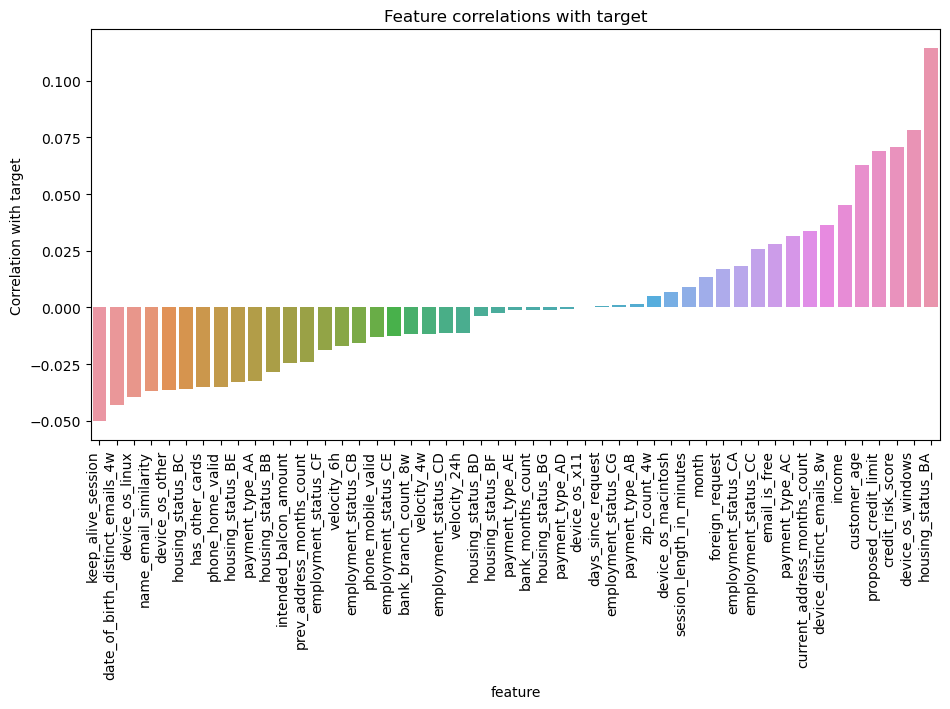

In [32]:
# Correlation coefficient between features and target

fig = plt.figure(figsize=(9.6,7.2))

corr_target = data_df_features_1.corrwith(data_df_target).reset_index()

corr_target.columns = ['feature','target_correlation']
corr_target = corr_target.sort_values(by='target_correlation')

ax = sns.barplot(data=corr_target,x='feature',y='target_correlation')
ax.set_title('Feature correlations with target')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Correlation with target')

fig.tight_layout()
plt.show()


## II.3.B Variable Importance

In [33]:
data_df_features_1.shape

(1000000, 49)

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

Since we are dealing with about 51 features or variables, we would need to choose the top variables that have higher relationship or influence on teh target variable, so as to make our models perform better. To do this, we would have to check the variable importance of each feature in relation to the target variable. To do this, we would utilize a RandomForest 

In [35]:
rf = RandomForestRegressor()

In [36]:
model = rf.fit(X_train, y_train)

In [40]:
print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.864571634685199
model score on testing data: 0.030173145024666947


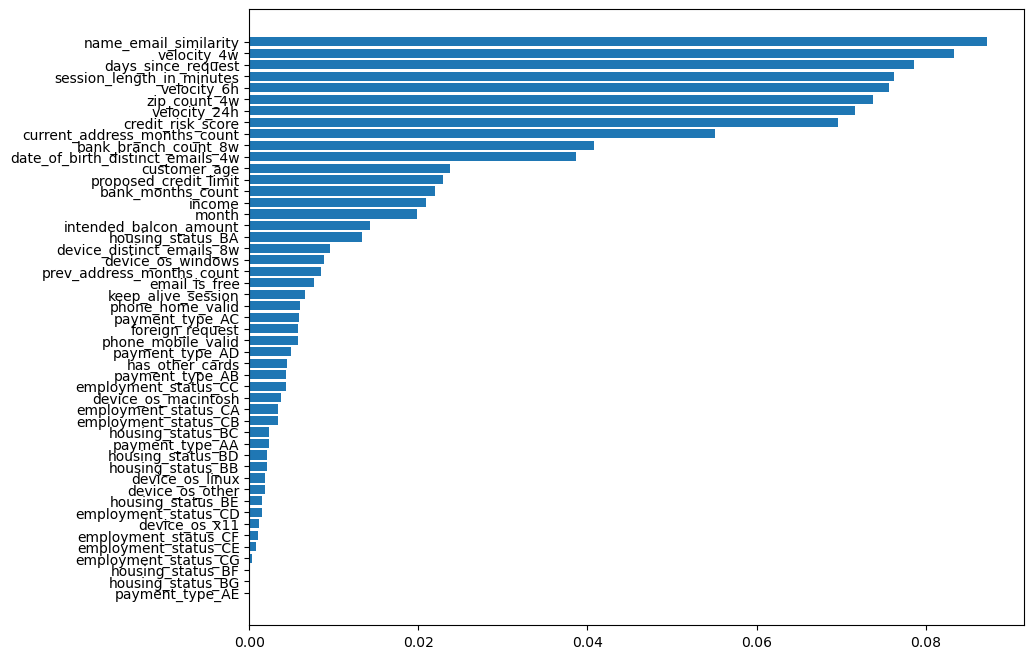

In [41]:
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [39]:
sort = rf.feature_importances_.argsort()

plt.barh(X_train.feature_names[sort], rf.feature_importances_[sort])

plt.xlabel("Feature Importance")

AttributeError: 'DataFrame' object has no attribute 'feature_names'

We'll be taking the top variables > 0.6. This includes name_email_similarity, velocity_4w, days_since_request, velocity_6h, session_length_in_minutes, zip_count_4w, velocity_24h, and credit_risk_score.

In [42]:
X_train = X_train[['name_email_similarity', 'velocity_4w', 'days_since_request', 'velocity_6h', 'session_length_in_minutes', 'zip_count_4w', 'velocity_24h', 'credit_risk_score']]
X_test = X_test[['name_email_similarity', 'velocity_4w', 'days_since_request', 'velocity_6h', 'session_length_in_minutes', 'zip_count_4w', 'velocity_24h', 'credit_risk_score']]

# III. Anomaly Detection

In [43]:
%%time

lof_model = LocalOutlierFactor(n_neighbors=2)
y_pred = lof_model.fit_predict(X_train)


CPU times: total: 2min 40s
Wall time: 3min 54s


In [44]:
# Let's see how many outliers our unsupervised model detected (outliers are tagged as -1)

tmp_df = pd.DataFrame(y_pred)
tmp_df.value_counts()

 1    690831
-1      9169
Name: count, dtype: int64

In [45]:
lof_model.negative_outlier_factor_

array([-1.01021993, -0.98636305, -0.89125208, ..., -1.38828422,
       -1.18050048, -1.05523748])

# IV. Logistic Regression

In [46]:
# Base model using all variables
logreg_model = LogisticRegression(random_state=0)
columns = data_df_features_1.columns

# Let's input our training data set and fit our model
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

Feature: 0 - income, Score: -1.391819
Feature: 1 - name_email_similarity, Score: -0.050430
Feature: 2 - prev_address_months_count, Score: 0.896705
Feature: 3 - current_address_months_count, Score: -0.453848
Feature: 4 - customer_age, Score: 0.955144
Feature: 5 - days_since_request, Score: 0.838757
Feature: 6 - intended_balcon_amount, Score: -0.005802
Feature: 7 - zip_count_4w, Score: 5.280083


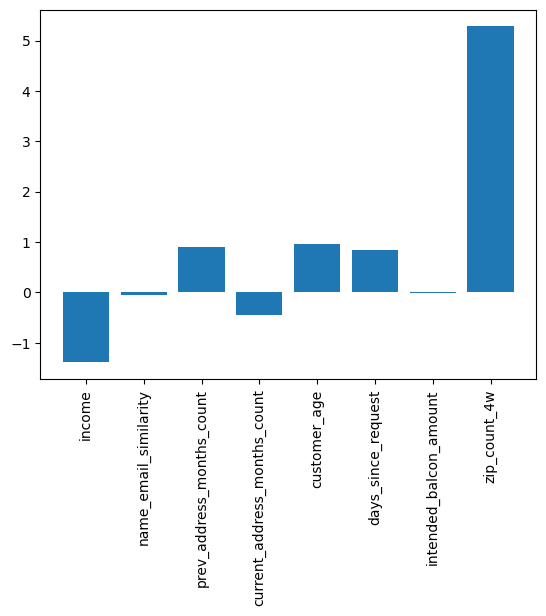

In [47]:
importance = logreg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns[i],v))

# plot feature importance
plt.bar([columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [48]:
# predict against X_test
y_pred = logreg_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
# Let's save our results in a variable for later use
y_pred_lr = y_pred

# How did our logistic regression perform?

print("accuracy: ",accuracy_score(y_test,y_pred_lr))
print("precision_score: ",precision_score(y_test,y_pred_lr))
print("recall_score: ",recall_score(y_test,y_pred_lr))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_lr)

accuracy:  0.9892866666666666


precision_score:  0.0
recall_score:  0.0
confusion matrix: 


array([[296786,      0],
       [  3214,      0]], dtype=int64)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


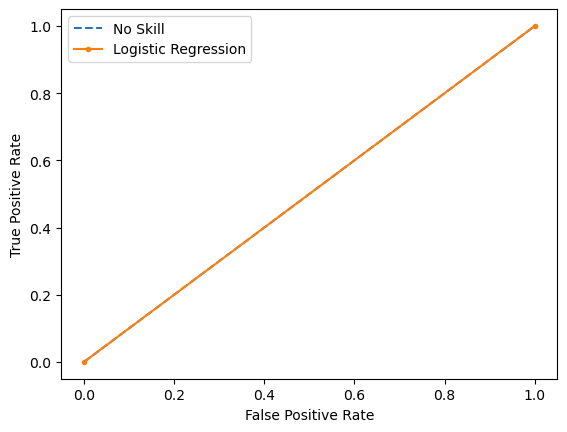

In [50]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_lr
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# V. Neural Network

In [51]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
nn_model = MLPClassifier(random_state=0)

nn_model.fit(X_train, y_train)

CPU times: total: 1min 30s
Wall time: 44.4 s


MLPClassifier(random_state=0)

In [52]:
# predict against X_test
y_pred = nn_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
# Let's save our results in a variable for later use
y_pred_nn = y_pred

# How did our neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_nn))
print("precision_score: ",precision_score(y_test,y_pred_nn))
print("recall_score: ",recall_score(y_test,y_pred_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_nn)

accuracy:  0.9892866666666666
precision_score:  0.0
recall_score:  0.0
confusion matrix: 


array([[296786,      0],
       [  3214,      0]], dtype=int64)

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.500


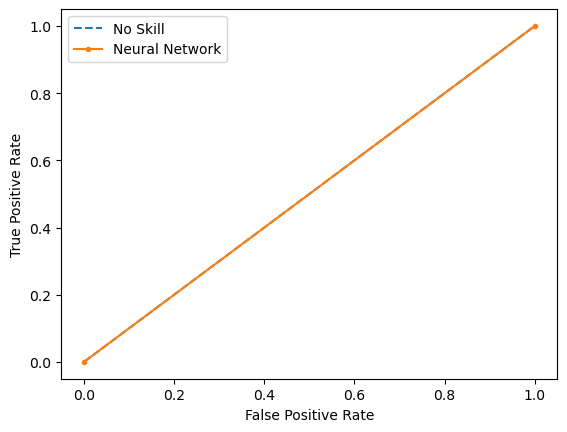

In [54]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_nn

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()